# AML-2103 Visualization for AI and ML Project

## Group Members
#### Bhanu Prakash Mahadevuni C0850515
#### Deeksha Naikap C0835440
#### Pramod Reddy Gurrala C0850493
#### Sai Varun Kollipara C0828403

#### Import Libraries and packages

In [1]:
import math
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from statsmodels.tsa.deterministic import CalendarFourier, DeterministicProcess
from sklearn.linear_model import LinearRegression
from pandas import date_range
from statsmodels.graphics.tsaplots import plot_pacf
import plotly.express as px
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import LabelEncoder
from xgboost import XGBRegressor

from sklearn.linear_model import ElasticNet, Lasso, Ridge

from sklearn.ensemble import ExtraTreesRegressor, RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.multioutput import RegressorChain
import warnings

In [2]:
# switch off the warnings
warnings.filterwarnings("ignore")

### Read and understand data

In [3]:
df_oil = pd.read_csv("oil.csv", index_col='date')
df_stores = pd.read_csv("stores.csv", index_col='store_nbr')
df_test = pd.read_csv("test.csv")
df_train = pd.read_csv("train.csv")
df_transactions = pd.read_csv("transactions.csv")
df_holidays = pd.read_csv("holidays_events.csv")

In [4]:
print('Number of train samples: ', df_train.shape)
print('Number of test samples: ', df_test.shape)
print('Number of store data: ', df_stores.shape)
print('Number of Holiday data: ', df_holidays.shape)
print('Number of Oil Price data: ', df_oil.shape)
print('Number of transactions data: ', df_transactions.shape)

Number of train samples:  (3000888, 6)
Number of test samples:  (28512, 5)
Number of store data:  (54, 4)
Number of Holiday data:  (350, 6)
Number of Oil Price data:  (1218, 1)
Number of transactions data:  (83488, 3)


In [5]:
df_train.head()

id        date  store_nbr      family  sales  onpromotion
0   0  2013-01-01          1  AUTOMOTIVE    0.0            0
1   1  2013-01-01          1   BABY CARE    0.0            0
2   2  2013-01-01          1      BEAUTY    0.0            0
3   3  2013-01-01          1   BEVERAGES    0.0            0
4   4  2013-01-01          1       BOOKS    0.0            0

In [6]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000888 entries, 0 to 3000887
Data columns (total 6 columns):
 #   Column       Dtype  
---  ------       -----  
 0   id           int64  
 1   date         object 
 2   store_nbr    int64  
 3   family       object 
 4   sales        float64
 5   onpromotion  int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 137.4+ MB


In [7]:
df_test.head()

id        date  store_nbr      family  onpromotion
0  3000888  2017-08-16          1  AUTOMOTIVE            0
1  3000889  2017-08-16          1   BABY CARE            0
2  3000890  2017-08-16          1      BEAUTY            2
3  3000891  2017-08-16          1   BEVERAGES           20
4  3000892  2017-08-16          1       BOOKS            0

In [8]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28512 entries, 0 to 28511
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           28512 non-null  int64 
 1   date         28512 non-null  object
 2   store_nbr    28512 non-null  int64 
 3   family       28512 non-null  object
 4   onpromotion  28512 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 1.1+ MB


In [9]:
df_oil.head()

dcoilwtico
date                  
2013-01-01         NaN
2013-01-02       93.14
2013-01-03       92.97
2013-01-04       93.12
2013-01-07       93.20

In [10]:
df_oil.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1218 entries, 2013-01-01 to 2017-08-31
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   dcoilwtico  1175 non-null   float64
dtypes: float64(1)
memory usage: 19.0+ KB


In [11]:
df_stores.head()

city                           state type  cluster
store_nbr                                                             
1                  Quito                       Pichincha    D       13
2                  Quito                       Pichincha    D       13
3                  Quito                       Pichincha    D        8
4                  Quito                       Pichincha    D        9
5          Santo Domingo  Santo Domingo de los Tsachilas    D        4

In [12]:
df_stores.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 54 entries, 1 to 54
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   city     54 non-null     object
 1   state    54 non-null     object
 2   type     54 non-null     object
 3   cluster  54 non-null     int64 
dtypes: int64(1), object(3)
memory usage: 2.1+ KB


In [13]:
df_transactions.head()

date  store_nbr  transactions
0  2013-01-01         25           770
1  2013-01-02          1          2111
2  2013-01-02          2          2358
3  2013-01-02          3          3487
4  2013-01-02          4          1922

In [14]:
df_transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83488 entries, 0 to 83487
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   date          83488 non-null  object
 1   store_nbr     83488 non-null  int64 
 2   transactions  83488 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 1.9+ MB


In [15]:
df_holidays.head()

date     type    locale locale_name                    description  \
0  2012-03-02  Holiday     Local       Manta             Fundacion de Manta   
1  2012-04-01  Holiday  Regional    Cotopaxi  Provincializacion de Cotopaxi   
2  2012-04-12  Holiday     Local      Cuenca            Fundacion de Cuenca   
3  2012-04-14  Holiday     Local    Libertad      Cantonizacion de Libertad   
4  2012-04-21  Holiday     Local    Riobamba      Cantonizacion de Riobamba   

   transferred  
0        False  
1        False  
2        False  
3        False  
4        False

In [16]:
df_holidays.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   date         350 non-null    object
 1   type         350 non-null    object
 2   locale       350 non-null    object
 3   locale_name  350 non-null    object
 4   description  350 non-null    object
 5   transferred  350 non-null    bool  
dtypes: bool(1), object(5)
memory usage: 14.1+ KB


### Exploratory Data Analysis

In [17]:
#change date datatype as datetime
df_train.date = pd.to_datetime(df_train.date)
df_test.date= pd.to_datetime(df_test.date)

df_train['year'] = df_train.date.dt.year
df_test['year'] = df_test.date.dt.year

df_train['month'] = df_train.date.dt.month
df_test['month'] = df_test.date.dt.month

df_train['dayofmonth'] = df_train.date.dt.day
df_test['dayofmonth'] = df_test.date.dt.day

df_train['dayofweek'] = df_train.date.dt.dayofweek
df_test['dayofweek'] = df_test.date.dt.dayofweek

df_train['dayname'] = df_train.date.dt.strftime('%A')
df_test['dayname'] = df_test.date.dt.strftime('%A')

In [18]:
print('Train: ',min(df_train.date),max(df_train.date))
print('\n')
print('Test: ',min(df_test.date),max(df_test.date))

Train:  2013-01-01 00:00:00 2017-08-15 00:00:00


Test:  2017-08-16 00:00:00 2017-08-31 00:00:00


In [19]:
df_train.onpromotion.unique()

array([  0,   3,   5,   1,  56,  20,  19,   2,   4,  18,  17,  12,   6,
         7,  10,   9,  50,   8,  16,  42,  51,  13,  15,  47,  21,  40,
        37,  54,  24,  58,  22,  59,  11,  45,  25,  55,  26,  43,  35,
        14,  28,  46,  36,  32,  53,  57,  27,  39,  41,  30,  29,  49,
        23,  48,  44,  38,  31,  52,  33,  34,  61,  60, 116,  86,  73,
       113, 102,  68, 104,  93,  70,  92, 121,  72, 178, 174, 161, 118,
       105, 172, 163, 167, 142, 154, 133, 180, 181, 173, 165, 168, 186,
       140, 149, 145, 169, 188,  62,  84, 111,  65, 107,  63, 101,  87,
       125,  94, 114, 171, 153, 170, 166, 141, 155, 179, 192, 131, 147,
       151, 189,  79,  74, 110,  64,  67,  99, 123, 157, 117, 150, 182,
       162, 160, 194, 135, 190,  69, 108,  89, 126, 156, 103, 146, 132,
       177, 164, 176, 112,  75, 109,  91, 128, 175, 187, 148, 137, 184,
       196, 144, 158, 119, 106,  66, 100,  90, 120, 115,  98, 159, 152,
       185, 139, 143,  80, 124,  71, 134, 193,  78,  88, 122, 13

In [20]:
df_train.family.unique()

array(['AUTOMOTIVE', 'BABY CARE', 'BEAUTY', 'BEVERAGES', 'BOOKS',
       'BREAD/BAKERY', 'CELEBRATION', 'CLEANING', 'DAIRY', 'DELI', 'EGGS',
       'FROZEN FOODS', 'GROCERY I', 'GROCERY II', 'HARDWARE',
       'HOME AND KITCHEN I', 'HOME AND KITCHEN II', 'HOME APPLIANCES',
       'HOME CARE', 'LADIESWEAR', 'LAWN AND GARDEN', 'LINGERIE',
       'LIQUOR,WINE,BEER', 'MAGAZINES', 'MEATS', 'PERSONAL CARE',
       'PET SUPPLIES', 'PLAYERS AND ELECTRONICS', 'POULTRY',
       'PREPARED FOODS', 'PRODUCE', 'SCHOOL AND OFFICE SUPPLIES',
       'SEAFOOD'], dtype=object)

### Handle missing value 

In [21]:
print(df_train.isna().sum())
print(df_test.isna().sum())

id             0
date           0
store_nbr      0
family         0
sales          0
onpromotion    0
year           0
month          0
dayofmonth     0
dayofweek      0
dayname        0
dtype: int64
id             0
date           0
store_nbr      0
family         0
onpromotion    0
year           0
month          0
dayofmonth     0
dayofweek      0
dayname        0
dtype: int64


### Handle duplicates

In [22]:
duplicate_records = df_train[df_train.duplicated()]
print("number of dupicate records:", duplicate_records.shape)

number of dupicate records: (0, 11)


In [23]:
duplicate_records = df_test[df_test.duplicated()]
print("number of dupicate records:", duplicate_records.shape)

number of dupicate records: (0, 10)


#### Yearly growth of product families

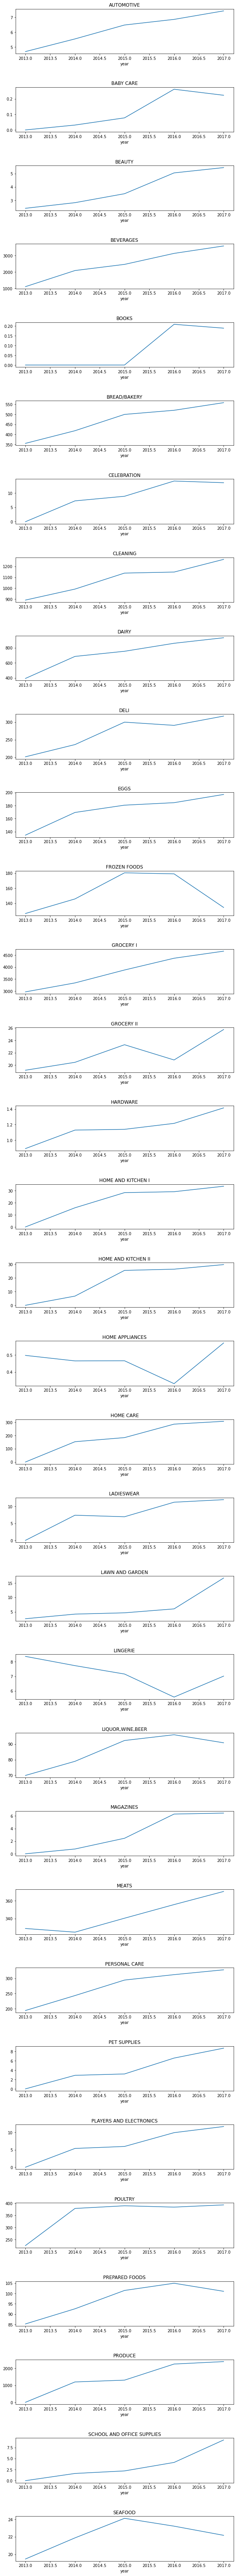

In [24]:
fig= plt.figure(figsize=(10,120))
fig.subplots_adjust(hspace=0.75)
for i,product in enumerate(df_train.family.unique()):
    ax = fig.add_subplot(33,1,i+1)
    df_train.query('family==@product').groupby(['year']).sales.mean().plot()
    plt.title(product);

#### Monthly Sales by Year

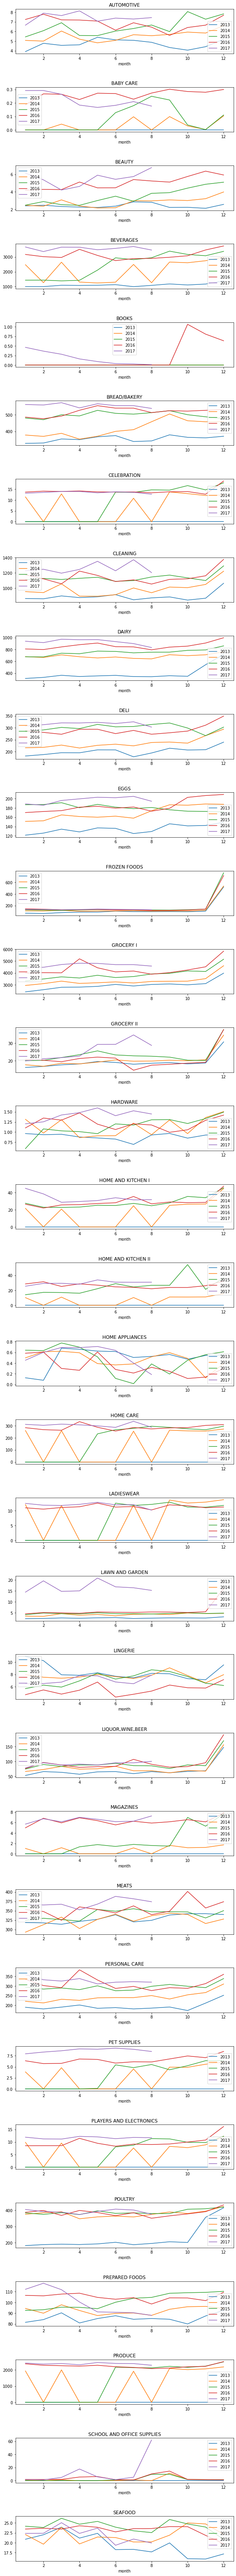

In [25]:
fig= plt.figure(figsize=(10,120))
fig.subplots_adjust(hspace=0.75)
for i,product in enumerate(df_train.family.unique()):
    ax = fig.add_subplot(33,1,i+1)
    select = df_train.query('family==@product')
    for year in [2013,2014,2015,2016,2017]: 
        select.query('year==@year').groupby('month').sales.mean().plot(ax=ax,label=year)
    plt.title(product)
    ax.legend();

#### Average Sales by day of month

Text(0.5, 1.0, 'Sales Average by Day of Month')

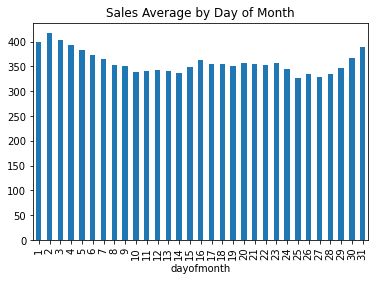

In [26]:
df_train.groupby('dayofmonth').sales.mean().plot(kind='bar')
plt.title('Sales Average by Day of Month')

#### Average Sales by day of week

Text(0.5, 1.0, 'Average Sales by Day of week')

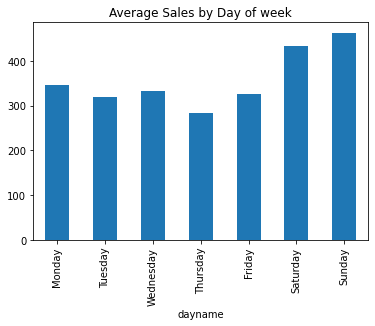

In [27]:
order = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
df_train.groupby('dayname').sales.mean().reindex(index=order).plot(kind='bar')
plt.title('Average Sales by Day of week')

In [28]:
df_year_s = df_train.groupby('year').mean()[['sales']]
df_year_s = df_year_s.reset_index()
df_year_s['color'] =['rgb(210, 251, 212)', 'rgb(165, 219,194)', 'rgb(123,188, 176)', 'rgb(85, 156,158)', 'rgb(58,124, 137)']

df_year = df_train.groupby('year').mean()[['onpromotion']]
df_year = df_year.reset_index()
df_year['color'] =['rgb(210, 251, 212)', 'rgb(165, 219,194)', 'rgb(123,188, 176)', 'rgb(85, 156,158)', 'rgb(58,124, 137)']


In [29]:
from plotly.subplots import make_subplots
import plotly.graph_objs as go
fig = make_subplots(rows=1, cols=2, 
                    subplot_titles=("Avg Sales by Year", "Avg On Promotion by Year"))
#SALES 
fig.append_trace(go.Bar(x=df_year_s['year'], y=df_year_s['sales'], marker = {'color': list(df_year_s['color'])}),
                row=1, col=1)


##ONPROMOTION
fig.append_trace(go.Bar(x=df_year['year'], y=df_year['onpromotion'], marker = {'color': list(df_year['color'])}),
                row=1, col=2)

fig.update_layout(height=500, width=1000, title_text="AVERAGE SALES & ONPROMOTION ANALYSIS",  
                  title_font=dict(size=30, color='#8a8d93'), showlegend=False)
fig.show()

#### Sales Ranking by Store

Text(0.5, 1.0, 'Sales Ranking by Store')

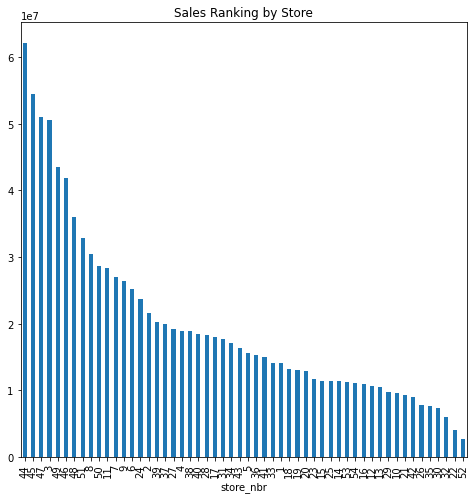

In [30]:
plt.figure(figsize=(8,8))
df_train.groupby('store_nbr').sales.sum().sort_values(ascending=False).plot(kind='bar')
plt.title('Sales Ranking by Store')

#### Promotion Items ranking by Store

Text(0.5, 1.0, 'Promotion Items Ranking by Store')

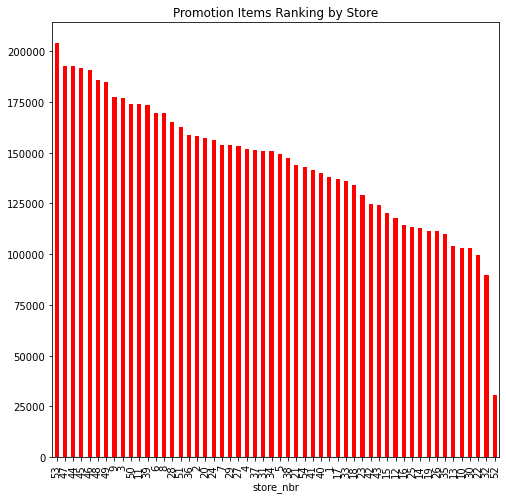

In [31]:
plt.figure(figsize=(8,8))
df_train.groupby('store_nbr').onpromotion.sum().sort_values(ascending=False).plot(kind='bar',color='red')
plt.title('Promotion Items Ranking by Store')

#### Promotion and Sales

Text(0.5, 1.0, 'Promotion and Sales Relationship')

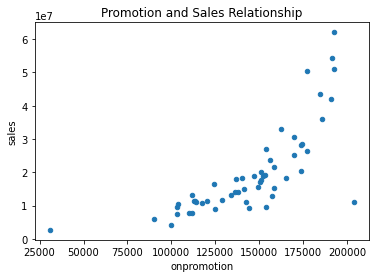

In [32]:
df_train.groupby('store_nbr')[['onpromotion','sales']].sum().plot.scatter('onpromotion','sales')
plt.title('Promotion and Sales Relationship')

fig = px.scatter(df_train[df_train['onpromotion'] > 0], x="onpromotion", y="sales", color='sales', 
                           color_continuous_scale="earth",
                 size='sales', log_x=True, size_max=30)

fig.update_layout({"title": f'Correlation between OnPromotion and Sales',
                   "xaxis": {"title":"On Promotion"},
                   "yaxis": {"title":"Sales"},
                   "showlegend": False})
fig.show()

In [33]:
df_sesonality = df_train.copy()

df_sesonality = df_sesonality.groupby('date').mean()[['sales']].reset_index()
#create month and year variables from date colum
df_sesonality['date'] = pd.to_datetime(df_sesonality['date'])
df_sesonality['year'] = df_sesonality['date'].dt.year
df_sesonality['month'] = df_sesonality['date'].dt.month
df_sesonality['weekofyear'] = df_sesonality['date'].dt.weekofyear
df_sesonality['day'] = df_sesonality['date'].dt.day
df_sesonality['dayofweek'] = df_sesonality['date'].dt.day_name()

<AxesSubplot:xlabel='dayofweek', ylabel='sales'>

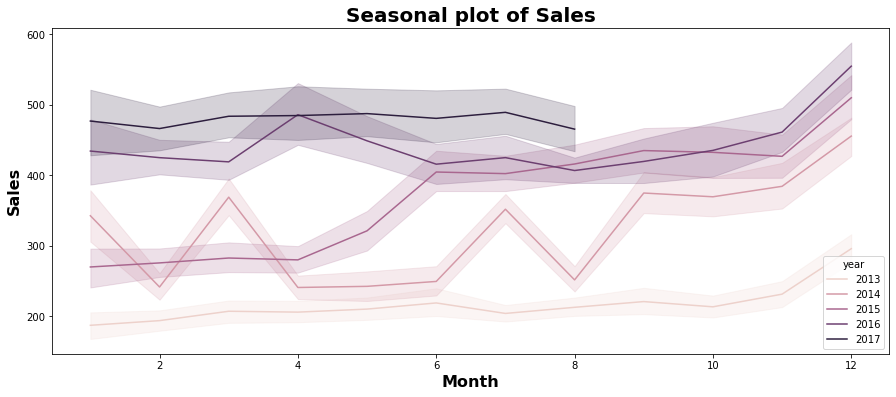

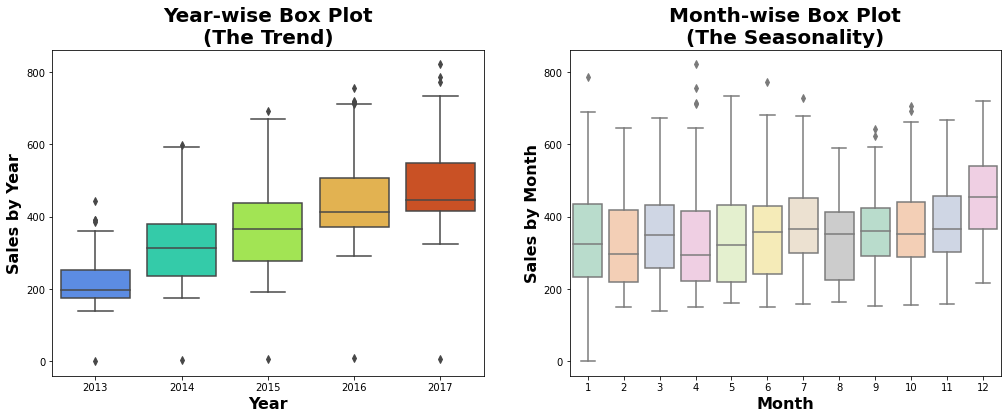

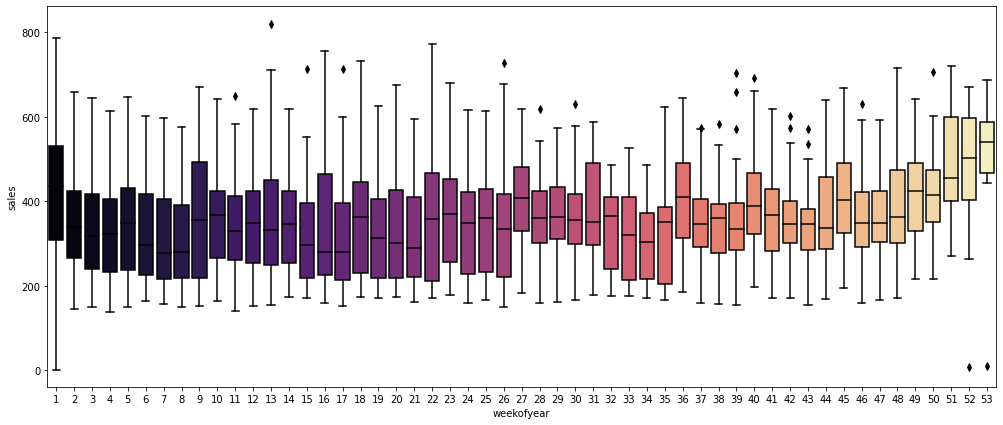

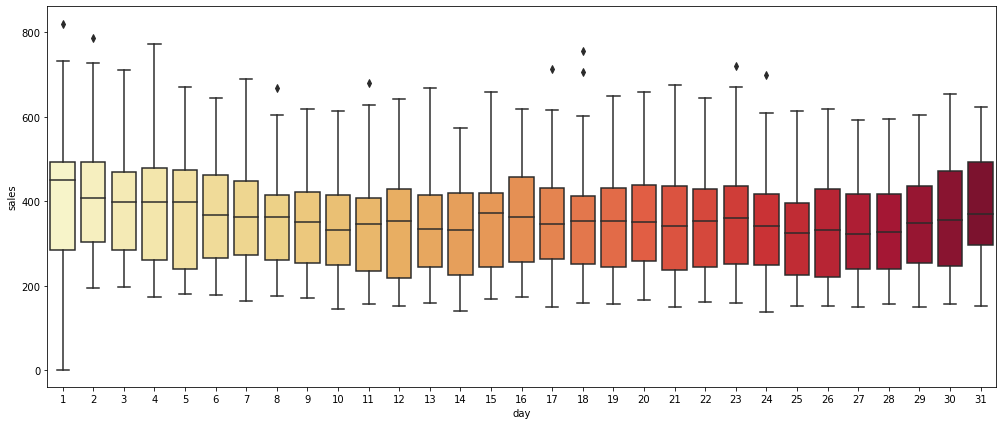

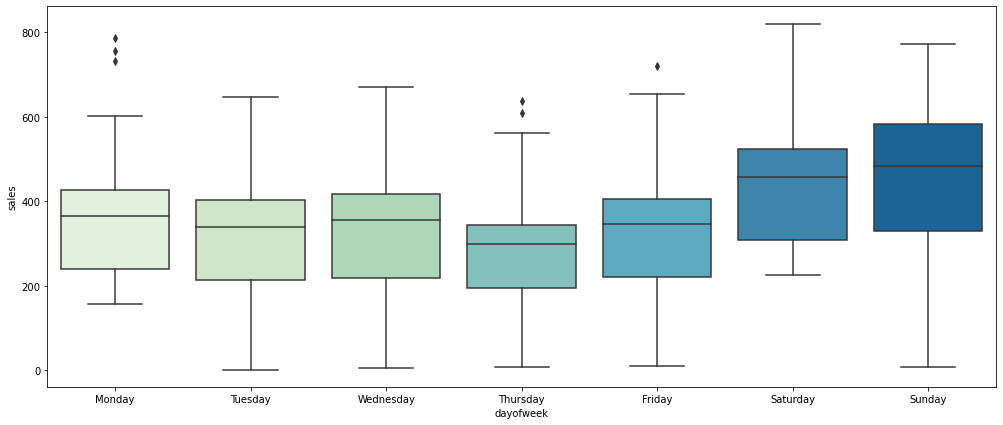

In [34]:
variable = 'sales'
fig, ax = plt.subplots(figsize=(15, 6))

palette = sns.color_palette("ch:2.5,-.2,dark=.3", 10)
sns.lineplot(df_sesonality['month'], df_sesonality[variable], hue=df_sesonality['year'])
ax.set_title('Seasonal plot of Sales', fontsize = 20, loc='center', fontdict=dict(weight='bold'))
ax.set_xlabel('Month', fontsize = 16, fontdict=dict(weight='bold'))
ax.set_ylabel('Sales', fontsize = 16, fontdict=dict(weight='bold'))


fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(17, 6))

sns.boxplot(df_sesonality['year'], df_sesonality[variable], palette="turbo",ax=ax[0])
ax[0].set_title('Year-wise Box Plot\n(The Trend)', fontsize = 20, loc='center', fontdict=dict(weight='bold'))
ax[0].set_xlabel('Year', fontsize = 16, fontdict=dict(weight='bold'))
ax[0].set_ylabel('Sales by Year', fontsize = 16, fontdict=dict(weight='bold'))

sns.boxplot(df_sesonality['month'], df_sesonality[variable], palette="Pastel2", ax=ax[1])
ax[1].set_title('Month-wise Box Plot\n(The Seasonality)', fontsize = 20, loc='center', fontdict=dict(weight='bold'))
ax[1].set_xlabel('Month', fontsize = 16, fontdict=dict(weight='bold'))
ax[1].set_ylabel('Sales by Month', fontsize = 16, fontdict=dict(weight='bold'))

#plot boxplots for every week of the year
fig = plt.figure(figsize=(17,7))
sns.boxplot(df_sesonality['weekofyear'], df_sesonality['sales'], palette="magma")

#plot boxplots for every day
fig = plt.figure(figsize=(17,7))
sns.boxplot(df_sesonality['day'], df_sesonality['sales'], palette="YlOrRd")

#plot boxplots for every day
fig = plt.figure(figsize=(17,7))
sns.boxplot(df_sesonality['dayofweek'], df_sesonality['sales'], palette="GnBu",
            order=['Monday', 'Tuesday', 'Wednesday', 
                    'Thursday', 'Friday', 'Saturday','Sunday'])


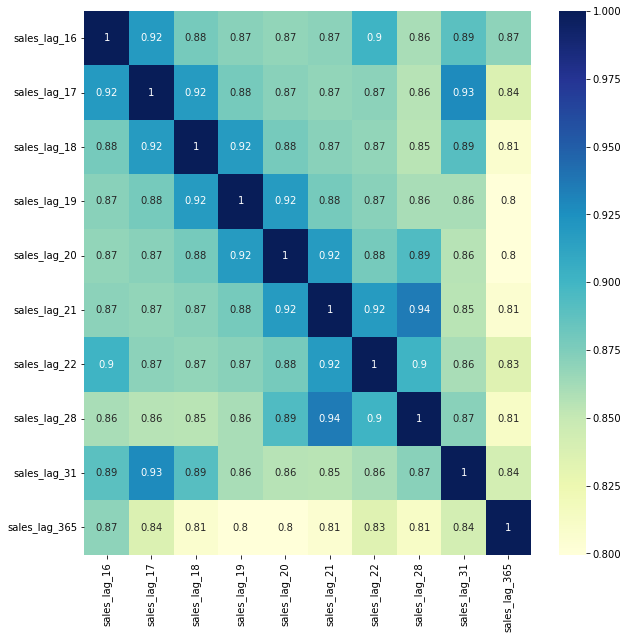

In [35]:
LAGS = [16, 17, 18, 19, 20, 21, 22, 28, 31, 365]

df_lag = df_train.copy()
for lag in LAGS:
    df_lag[f"sales_lag_{lag}"] = df_lag.groupby(['store_nbr', 'family'])['sales'].transform(lambda x: x.shift(lag))

##check heatmap of lag features. 
df_lag_corr = df_lag[[col for col in list(df_lag.columns) if col.startswith('sales_')]]
plt.figure(figsize=(10,10))
sns.heatmap(df_lag_corr.corr(), annot=True, cmap="YlGnBu")
plt.show()

In [36]:
df_holidays_copy = df_holidays
df_holidays_copy.date = pd.to_datetime(df_holidays_copy.date)
df_plot = pd.merge(df_holidays_copy, df_train, on='date', how='inner')
df_plot.loc[df_plot['description'].isin(['Black Friday', 'Cyber Monday']), 'type'] = 'black_friday_cyber_monday'

fig = px.scatter(df_plot, x="date", y="sales", size='sales', color='type')


fig.update_layout({"title": f'Avg Sales on Holiday Events days',
                   "xaxis": {"title":"HOLIDAY EVENT DATE"},
                   "yaxis": {"title":"Avg Sales"},
                   "showlegend": True})

fig.add_annotation(x='2014-07-05',y=500,xref="x",yref="y",text="WORLD CUP",showarrow=True, align="center",arrowhead=2,arrowsize=1,
        arrowwidth=2,arrowcolor="#636363",ax=0,ay=-30,bordercolor="#c7c7c7",borderwidth=2,borderpad=4,bgcolor="#ca8ee8",opacity=0.8  )

fig.add_annotation(x='2016-04-20',y=800,xref="x",yref="y",text="EARTHQUAKE",showarrow=True,align="center",arrowhead=2,arrowsize=1,
        arrowwidth=2,arrowcolor="#636363",ax=0,ay=-30,bordercolor="#c7c7c7",borderwidth=2,borderpad=4,bgcolor="#ca8ee8",opacity=0.8)

fig.add_annotation(x='2013-12-30',y=200,xref="x",yref="y",text="CHRISTAMS 13/14",showarrow=True,align="center",arrowhead=2,arrowsize=1,
        arrowwidth=2,arrowcolor="#636363",ax=0,ay=30,bordercolor="#c7c7c7",borderwidth=2,borderpad=4,bgcolor="#3ce685",opacity=0.8)


fig.add_annotation(x='2014-12-30',y=200,xref="x",yref="y",text="CHRISTAMS 14/15",showarrow=True,align="center",arrowhead=2,arrowsize=1,
        arrowwidth=2,arrowcolor="#636363",ax=0,ay=30,bordercolor="#c7c7c7",borderwidth=2,borderpad=4,bgcolor="#3ce685",opacity=0.8)


fig.add_annotation(x='2015-12-30',y=200,xref="x",yref="y",text="CHRISTAMS 15/16",showarrow=True,align="center",arrowhead=2,arrowsize=1,
        arrowwidth=2,arrowcolor="#636363",ax=0,ay=30,bordercolor="#c7c7c7",borderwidth=2,borderpad=4,bgcolor="#3ce685",opacity=0.8)


fig.add_annotation(x='2016-12-30',y=200,xref="x",yref="y",text="CHRISTAMS 16/17",showarrow=True,align="center",arrowhead=2,arrowsize=1,
        arrowwidth=2,arrowcolor="#636363",ax=0,ay=30,bordercolor="#c7c7c7",borderwidth=2,borderpad=4,bgcolor="#3ce685",opacity=0.8)



fig.show()

### oil

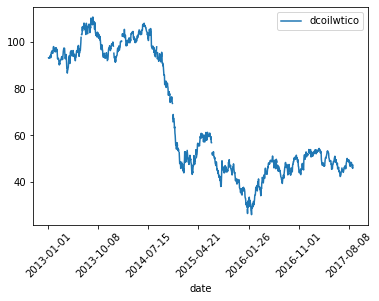

In [37]:
df_oil.plot();
plt.xticks(rotation=45);

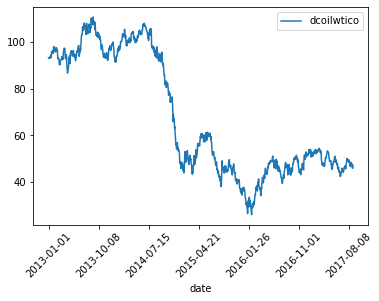

In [38]:
#filling missing data
df_oil = df_oil.interpolate(method='linear')
#the first row is still missing the value
df_oil.iloc[0] = df_oil.iloc[1]
df_oil.plot();
plt.xticks(rotation=45);

In [39]:
import datetime

start_date = df_train.date.min() 
# from beggining of the train date and the end of test date
number_of_days = 1704 #1703
date_list = [(start_date + datetime.timedelta(days = day)).isoformat() for day in range(number_of_days)]

date = (pd.Series(date_list)).to_frame()
date.columns = ['date']
date.date = pd.to_datetime(date.date)
date['date_str'] = date.date.astype(str)
df_oil['date_str'] = df_oil.index.astype(str)

df_oil = pd.merge(date,df_oil,how='left',on='date_str')

<AxesSubplot:xlabel='date'>

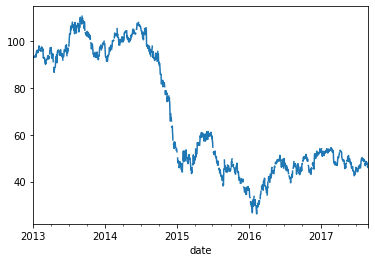

In [40]:
df_oil.set_index('date').dcoilwtico.plot()

In [41]:
df_oil = df_oil.set_index('date').dcoilwtico.interpolate(method='linear').to_frame()

In [42]:
df_oil['date_str'] = df_oil.index.astype(str)

In [43]:
# add oil price to the train date
df_train['date_str'] = df_train.date.astype(str)

df_train = pd.merge(df_train,df_oil,how='left',on='date_str')
df_train.drop(columns='date_str',axis=1,inplace=True)

In [44]:
df_test['date_str'] = df_test.date.astype(str)
df_test = pd.merge(df_test,df_oil,how='left', on='date_str')

df_test.drop(columns='date_str',axis=1,inplace=True)

In [45]:
plt.figure(figsize=(10,10))
df_train.groupby('family')[['sales','dcoilwtico']].corr().iloc[0::2,-1].sort_values()

family                           
HOME CARE                   sales   -0.453710
MAGAZINES                   sales   -0.380593
HOME AND KITCHEN II         sales   -0.375661
PRODUCE                     sales   -0.340423
HOME AND KITCHEN I          sales   -0.328061
PLAYERS AND ELECTRONICS     sales   -0.327215
BEVERAGES                   sales   -0.318847
PET SUPPLIES                sales   -0.307063
CELEBRATION                 sales   -0.294697
LADIESWEAR                  sales   -0.255375
DAIRY                       sales   -0.220657
PERSONAL CARE               sales   -0.204594
BEAUTY                      sales   -0.203606
GROCERY I                   sales   -0.195793
DELI                        sales   -0.190362
BREAD/BAKERY                sales   -0.177374
LAWN AND GARDEN             sales   -0.164715
CLEANING                    sales   -0.159257
AUTOMOTIVE                  sales   -0.145956
BABY CARE                   sales   -0.122380
POULTRY                     sales   -0.114485


<Figure size 720x720 with 0 Axes>

### Stores

In [46]:
df_train = pd.merge(df_train,df_stores,how='left',on='store_nbr')
df_test = pd.merge(df_test,df_stores,how='left',on='store_nbr')

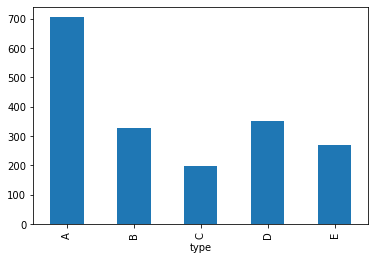

In [47]:
df_train.groupby(['type']).sales.mean().plot(kind='bar');

Text(0.5, 1.0, 'Number of Stores by City')

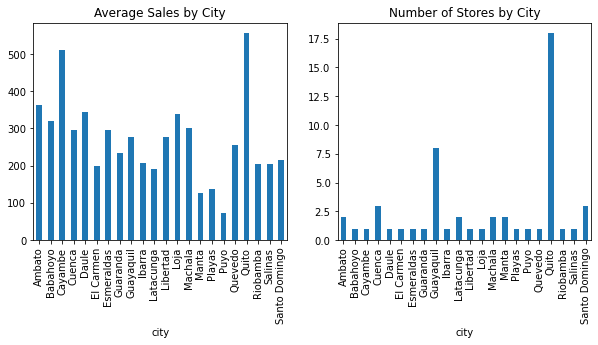

In [48]:
plt.figure(figsize=(10,4))

ax1 = plt.subplot(1,2,1)
df_train.groupby(['city']).sales.mean().plot(kind='bar')
plt.title('Average Sales by City')
ax2 = plt.subplot(1,2,2)
df_train.groupby(['city'])['store_nbr'].nunique().plot(kind='bar')
plt.title('Number of Stores by City')

Text(0.5, 1.0, 'Number of Stores by City')

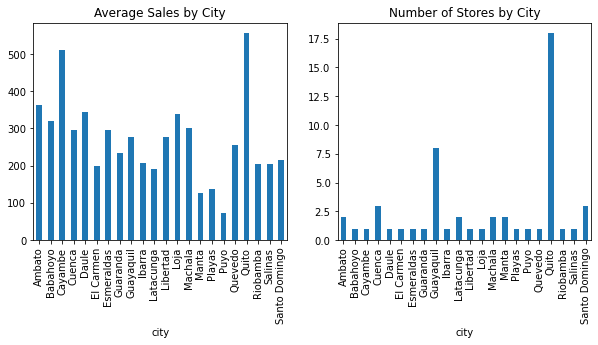

In [49]:
plt.figure(figsize=(10,4))

ax1 = plt.subplot(1,2,1)
df_train.groupby(['city']).sales.mean().plot(kind='bar')
plt.title('Average Sales by City')
ax2 = plt.subplot(1,2,2)
df_train.groupby(['city'])['store_nbr'].nunique().plot(kind='bar')
plt.title('Number of Stores by City')

In [50]:
df_train.groupby(['cluster','store_nbr','city','type']).nunique()

id  date  family  sales  onpromotion  \
cluster store_nbr city          type                                            
1       24        Guayaquil     D     55572  1684      33  15182          160   
        25        Salinas       D     55572  1684      33  12023          149   
        27        Daule         D     55572  1684      33  15260          159   
2       37        Cuenca        D     55572  1684      33  15065          173   
        42        Cuenca        D     55572  1684      33   7676          157   
3       16        Santo Domingo C     55572  1684      33   7431          116   
        30        Guayaquil     C     55572  1684      33   6665          108   
        32        Guayaquil     C     55572  1684      33   6402           97   
        33        Quevedo       C     55572  1684      33   8091          130   
        35        Playas        C     55572  1684      33   6851          107   
        40        Machala       C     55572  1684      33   8998          127   
        54        El Carmen     C     55572  1684      33   7546          180   
4       5         Santo Domingo D     55572  1684      33  14753          165   
        38        Loja          D     55572  1684      33  15025          169   
        41        Machala       D     55572  1684      33  14040          165   
5       44        Quito         A     55572  1684      33  18368          199   
6       9         Quito         B     55572  1684      33  13939          155   
        11        Cayambe       B     55572  1684      33  12111          152   
        20        Quito         B     55572  1684      33   8613          154   
        21        Santo Domingo B     55572  1684      33   6698          147   
        34        Guayaquil     B     55572  1684      33  11151          139   
        39        Cuenca        B     55572  1684      33  13105          170   
7       14        Riobamba      C     55572  1684      33   7562          115   
        22        Puyo          C     55572  1684      33   3970          114   
8       3         Quito         D     55572  1684      33  17801          193   
        7         Quito         D     55572  1684      33  15462          180   
        8         Quito         D     55572  1684      33  16181          179   
9       4         Quito         D     55572  1684      33  15031          168   
        23        Ambato        D     55572  1684      33  13308          159   
10      26        Guayaquil     D     55572  1684      33  10077          126   
        28        Guayaquil     E     55572  1684      33  12604          148   
        29        Guayaquil     E     55572  1684      33   7463          155   
        31        Babahoyo      B     55572  1684      33  11503          140   
        36        Libertad      E     55572  1684      33  11242          153   
        43        Esmeraldas    E     55572  1684      33   9372          135   
11      45        Quito         A     55572  1684      33  18217          199   
        49        Quito         A     55572  1684      33  17364          194   
        52        Manta         A     55572  1684      33   1681          103   
12      17        Quito         C     55572  1684      33   8313          137   
13      1         Quito         D     55572  1684      33  13668          155   
        2         Quito         D     55572  1684      33  14579          174   
        6         Quito         D     55572  1684      33  15947          177   
        53        Manta         D     55572  1684      33  10030          239   
14      46        Quito         A     55572  1684      33  17221          189   
        47        Quito         A     55572  1684      33  18004          200   
        48        Quito         A     55572  1684      33  16930          191   
        50        Ambato        A     55572  1684      33  16358          183   
15      10        Quito         C     55572  1684      33   7330        

### Holidays

In [51]:
df_holidays.query('transferred==True')

df_holidays = df_holidays.query('transferred ==False')
df_holidays.description = df_holidays.description.str.replace('Traslado ','')

national = df_holidays.query('locale=="National"')

day_off = national.query('type!="Work Day" or type!="Event"').set_index('date')['description'].to_dict()

df_train['date_str'] = df_train.date.astype(str)
df_test['date_str'] = df_test.date.astype(str)

df_train['national_holiday'] = [1 if a in day_off else 0 for a in df_train.date_str]
df_test['national_holiday'] = [1 if a in day_off else 0 for a in df_test.date_str]

event = national.query('type=="Event"').set_index('date')['description'].to_dict()

df_train['national_event'] =[1 if a in event else 0 for a in df_train.date_str]
df_test['national_event'] =[1 if a in event else 0 for a in df_test.date_str]

work_day = national.query('type=="Work Day"').set_index('date')['description'].to_dict()
df_train['national_workday'] = [1 if a in work_day else 0 for a in df_train.date_str]
df_test['national_workday'] = [1 if a in work_day else 0 for a in df_test.date_str]

df_train['weekend'] = [1 if a>=5 else 0 for a in df_train.dayofweek]
df_test['weekend'] = [1 if a>=5 else 0 for a in df_test.dayofweek]


In [52]:
df_train.columns

Index(['id', 'date', 'store_nbr', 'family', 'sales', 'onpromotion', 'year',
       'month', 'dayofmonth', 'dayofweek', 'dayname', 'dcoilwtico', 'city',
       'state', 'type', 'cluster', 'date_str', 'national_holiday',
       'national_event', 'national_workday', 'weekend'],
      dtype='object')

In [53]:
#locale
#locale is corresponding to city of train_df
local = df_holidays.query('locale=="Local"')
local_dic = local.set_index('date').locale_name.to_dict()
df_train['local_holiday']=[1 if b in local_dic and local_dic[b]== a else 0 for a,b in zip(df_train.city,df_train.date_str)]
df_test['local_holiday']=[1 if b in local_dic and local_dic[b]== a else 0 for a,b in zip(df_test.city,df_test.date_str)]

In [54]:
#Regional
#Regional is corresonding to state of train_df
regional = df_holidays.query('locale=="Regional"')
regional_dic = regional.set_index('date').locale_name.to_dict()
df_train['regional_holiday']= [1 if b in regional_dic and regional_dic[b]== a else 0 for a,b in zip(df_train.state,df_train.date_str)]
df_test['regional_holiday']= [1 if b in regional_dic and regional_dic[b]== a else 0 for a,b in zip(df_test.state,df_test.date_str)]

### Data Preparation

In [55]:
len(df_train.query('date_str=="2013-01-01"'))

1782

In [56]:
df_train.sales = np.log1p(df_train.sales)

In [57]:
df_train['Istest'] = False
df_test['Istest'] = True

full = pd.concat((df_train,df_test))

full['Lag_16'] = full['sales'].shift(1782*16)
full['Lag_17'] = full['sales'].shift(1782*17)
full['Lag_18'] = full['sales'].shift(1782*18)
full['Lag_19'] = full['sales'].shift(1782*19)
full['Lag_20'] = full['sales'].shift(1782*20)
full["Lag_21"] = full['sales'].shift(1782*21)
full['Lag_22'] = full['sales'].shift(1782*22)
full['Lag_28'] = full['sales'].shift(1782*28)
full['Lag_31'] = full['sales'].shift(1782*31)

full['Lag_365'] = full['sales'].shift(1782*365)


df_train = full.query('Istest==False')
df_test = full.query('Istest ==True')

In [58]:
df_train = df_train.dropna(subset=['Lag_365'],axis=0)

In [59]:
df_train.columns

Index(['id', 'date', 'store_nbr', 'family', 'sales', 'onpromotion', 'year',
       'month', 'dayofmonth', 'dayofweek', 'dayname', 'dcoilwtico', 'city',
       'state', 'type', 'cluster', 'date_str', 'national_holiday',
       'national_event', 'national_workday', 'weekend', 'local_holiday',
       'regional_holiday', 'Istest', 'Lag_16', 'Lag_17', 'Lag_18', 'Lag_19',
       'Lag_20', 'Lag_21', 'Lag_22', 'Lag_28', 'Lag_31', 'Lag_365'],
      dtype='object')

In [60]:
FEATURES = ['store_nbr','family','onpromotion', 'year', 'month',
       'dayofmonth', 'dayofweek','dcoilwtico', 'city', 'state',
       'type', 'cluster', 'national_holiday', 'national_event',
       'national_workday', 'weekend', 'local_holiday', 'regional_holiday','Lag_16','Lag_17','Lag_18','Lag_19','Lag_20','Lag_21','Lag_22','Lag_28','Lag_31','Lag_365']
TARGET =['sales']

In [61]:
from sklearn import preprocessing
categories = ['family','city','state','type']
for i in categories:
    encoder = preprocessing.LabelEncoder()
    df_train[i] = encoder.fit_transform(df_train[i])
    df_test[i] =  encoder.transform(df_test[i])

### Split data

In [62]:
from sklearn.model_selection import train_test_split
X_train,X_val,y_train,y_val = train_test_split(df_train,df_train[TARGET],test_size=0.05,shuffle=False)

### Model Building and Evaluation

In [64]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_log_error

xgb = XGBRegressor(n_estimators=500)
model_XGB = xgb.fit(X_train[FEATURES], y_train,
        eval_set=[(X_train[FEATURES],y_train),(X_val[FEATURES], y_val)],
       verbose=False,early_stopping_rounds=10)

predictions= xgb.predict(X_val[FEATURES])
predictions = [a if a>0 else 0 for a in predictions]
print('MSLE: ',mean_squared_log_error(y_val,predictions))
print(model_XGB)


MSLE:  0.03226792595710696
XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=500, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)
